In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [30]:
df = pd.read_csv('./Data/Final_invoice.csv',encoding='latin-1')

In [31]:
columns_to_be_removed = df.isnull().sum()[df.isnull().sum().sort_values() > 197285].index

In [32]:
invoice = df.drop(columns=columns_to_be_removed)

In [33]:
Rtl_data = invoice[invoice['Cust Type'] == 'Retail'].reset_index(drop=True)

In [34]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Total Amt Wtd Tax.']>0)]

In [35]:
Rtl_data

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,02-01-2015,7005200002,11:30:36,168303,13-12-2014,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,03-01-2015,7005200003,10:07:32,173997,02-01-2015,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,03-01-2015,7005200004,11:12:57,173889,02-01-2015,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,03-01-2015,7005200006,12:07:17,173860,02-01-2015,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2
5,5,THANE,THANE,Retail,84457,Maharashtra,00:00:00,03-01-2015,7005200007,12:10:08,174053,02-01-2015,15:15:10,13122,0.000,TOYOTA,0.000,INNOVA,851.700,Running Repairs,14.220,400603,BC01,THANE,NO,0.000,MH04GM2960,865.920,BC01SA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488990,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,30-06-2016,7231000017,14:56:58,400100,30-06-2016,09:15:12,72546,2495.900,MARUTI SUZUKI,374.970,ALTO,0.000,Paid Service,1587.280,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN38Y9343,4458.150,X405SA1
488991,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,30-06-2016,7231000018,15:06:52,400092,30-06-2016,08:42:15,18968,2443.470,NISSAN,0.000,MICRA,0.000,Paid Service,4388.610,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN22CK0396,6832.080,X405SA1
488992,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,30-06-2016,7231000019,15:43:56,400082,30-06-2016,08:27:51,177433,2598.920,MAHINDRA & MAHINDRA,0.000,SCORPIO CRDE,0.000,Paid Service,6588.790,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN07BA0211,9187.710,X405SA1
488993,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,30-06-2016,7231000020,15:58:59,400545,30-06-2016,12:53:48,22932,11000.000,HONDA,100.000,AMAZE,0.000,Accidental,0.000,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN07BV9290,11100.000,X405SA1


In [36]:
df1 = Rtl_data[['Make','Model','Order Type','Total Amt Wtd Tax.']]

In [37]:
df1.isnull().sum()

Make                     0
Model                 1305
Order Type               0
Total Amt Wtd Tax.       0
dtype: int64

In [38]:
df1.dropna(axis = 0,inplace = True)

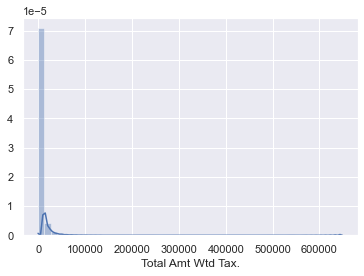

In [39]:
sns.distplot(df1['Total Amt Wtd Tax.'])
plt.show()

In [40]:
df1['Total Amt Wtd Tax.'] = np.log(df1['Total Amt Wtd Tax.'])

In [41]:
df1['Model'] = df1['Model'].astype(str)

In [42]:
from sklearn.preprocessing import scale, LabelEncoder
le = LabelEncoder()
le.fit(df1['Make'])
df1['Make']=le.transform(df1['Make'])

le.fit(df1['Model'])
df1['Model']=le.transform(df1['Model'])

le.fit(df1['Order Type'])
df1['Order Type']=le.transform(df1['Order Type'])

In [43]:
df1

,Make,Model,Order Type,Total Amt Wtd Tax.
0,6,188,2,8.307
1,24,100,6,6.909
2,13,240,4,5.452
4,9,178,2,7.918
5,25,104,4,6.764
...,...,...,...,...
488990,13,16,2,8.402
488991,17,133,2,8.829
488992,12,180,2,9.126
488993,8,17,0,9.315


In [44]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df1)
# datamart_normalized = scaler.transform(df1)

In [45]:
col

NameError: name 'col' is not defined

In [46]:
# Scale All features
cols = [df1.columns]
for col in cols:
    df1[col] = scale(np.array(df1[col]))

df1.head()

,Make,Model,Order Type,Total Amt Wtd Tax.
0,-1.216,0.779,-0.667,0.546
1,1.822,-0.441,2.112,-0.229
2,-0.035,1.499,0.722,-1.037
4,-0.710,0.640,-0.667,0.330
5,1.991,-0.385,0.722,-0.310


In [47]:
X = np.array(df1)

In [48]:
X

array([[-1.21609029,  0.77862645, -0.66686065,  0.54553964],
       [ 1.82212555, -0.44090351,  2.11175993, -0.22909173],
       [-0.03456191,  1.4992578 ,  0.72244964, -1.03669209],
       ...,
       [-0.20335168,  0.66776009, -0.66686065,  0.99919309],
       [-0.87851075, -1.591142  , -2.05617094,  1.10396818],
       [-0.03456191,  1.33295826,  0.72244964, -0.39086369]])

In [69]:
datamart_normalized

NameError: name 'datamart_normalized' is not defined

In [55]:
# Code starts here
from sklearn.cluster import KMeans
# Empty list for storing WCSS across all values of k
dist = []

# Iterate from 1-9

# Initialize KMeans algorithm
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0,max_iter=300)
    kmeans.fit(datamart_normalized)
    dist.append(kmeans.inertia_)
plt.plot(range(1,10),dist)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

NameError: name 'datamart_normalized' is not defined

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10, max_iter=300)
kmeans.fit(X)
cluster_labels = kmeans.labels_
#Find the clusters for the observation given in the dataset
df1['Cluster'] = cluster_labels
df1.head()

,Make,Model,Order Type,Total Amt Wtd Tax.,Cluster
0,-1.216,0.779,-0.667,0.546,2
1,1.822,-0.441,2.112,-0.229,1
2,-0.035,1.499,0.722,-1.037,0
4,-0.710,0.640,-0.667,0.330,2
5,1.991,-0.385,0.722,-0.310,1


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=0)

In [58]:
df1['x'] = pca.fit_transform(df1)[:,0]

In [59]:
df1['y'] = pca.fit_transform(df1)[:,1]

In [60]:
df1

,Make,Model,Order Type,Total Amt Wtd Tax.,Cluster,x,y
0,-1.216,0.779,-0.667,0.546,2,-0.496,-0.863
1,1.822,-0.441,2.112,-0.229,1,1.258,1.370
2,-0.035,1.499,0.722,-1.037,0,2.328,0.488
4,-0.710,0.640,-0.667,0.330,2,-0.401,-0.733
5,1.991,-0.385,0.722,-0.310,1,0.982,0.498
...,...,...,...,...,...,...,...
488990,-0.035,-1.605,-0.667,0.598,3,-2.194,-0.130
488991,0.641,0.016,-0.667,0.835,2,-0.472,-1.025
488992,-0.203,0.668,-0.667,0.999,2,-0.377,-1.253
488993,-0.879,-1.591,-2.056,1.104,2,-2.100,-1.368


In [61]:
df1.plot.scatter(x='x', y='y', c='Cluster', colormap='viridis')

Error in callback <function flush_figures at 0x000001A89B4965E8> (for post_execute):


KeyboardInterrupt: 

In [62]:
df1['Cluster'].value_counts()

3    127521
0    117372
2    113078
1     77674
Name: Cluster, dtype: int64

In [64]:
df2 = Rtl_data[['Make','Model','Order Type','Total Amt Wtd Tax.']]

In [65]:
df2['Cluster'] = df1['Cluster']

In [66]:
df2['Cluster'].value_counts()

3.000    127521
0.000    117372
2.000    113078
1.000     77674
Name: Cluster, dtype: int64

In [67]:
df2.to_csv('cluster_make.csv')

In [68]:
X = datamart_normalized

NameError: name 'datamart_normalized' is not defined

In [70]:
df1

,Make,Model,Order Type,Total Amt Wtd Tax.,Cluster,x,y
0,-1.216,0.779,-0.667,0.546,2,-0.496,-0.863
1,1.822,-0.441,2.112,-0.229,1,1.258,1.370
2,-0.035,1.499,0.722,-1.037,0,2.328,0.488
4,-0.710,0.640,-0.667,0.330,2,-0.401,-0.733
5,1.991,-0.385,0.722,-0.310,1,0.982,0.498
...,...,...,...,...,...,...,...
488990,-0.035,-1.605,-0.667,0.598,3,-2.194,-0.130
488991,0.641,0.016,-0.667,0.835,2,-0.472,-1.025
488992,-0.203,0.668,-0.667,0.999,2,-0.377,-1.253
488993,-0.879,-1.591,-2.056,1.104,2,-2.100,-1.368


In [71]:
X = np.array(df1[['Make','Total Amt Wtd Tax.']])

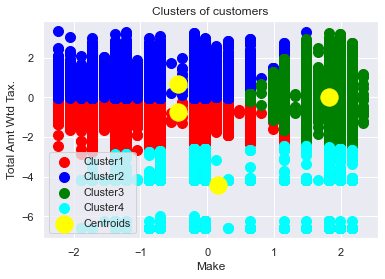

In [73]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Make')
plt.ylabel('Total Amt Wtd Tax.')
plt.legend()
plt.show()
